# Camunda 8 Workers:
## Comparing Power Consumption in Idle

These Measurements were done with Kepler on `restworkerjava`. Scrape interval was **30 seconds**, measuring window was **21 minutes**

*Author: Jan Wittrowski*

### Cheatsheet

```df.loc[row, col]```


## Importing, Preparation

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read first CSV containing idle measurement 1-7
rawdata = pd.read_csv("CSV/idle_1_7.csv", 
                     header=1, # which row contains column headers
                    index_col=0) # which column contains labels

# read 2nd CSV cotaining idle measurementes 8-14
rawdata2 = pd.read_csv("CSV/idle_8_14.csv", 
                     header=1, # which row contains column headers
                    index_col=0) # which column contains labels

# read 3rd CSV containing idle measurements 15 and 16
rawdata3 = pd.read_csv("CSV/idle_15_16.csv", 
                      header=1, # which row contains column headers
                     index_col=0) # which column contains labels


In [111]:
#concatenate both df

rawdata = pd.concat([rawdata, rawdata2, rawdata3], axis=1)

rawdata

,load-controller-5445f6d748-hgqvd / worker / PKG,load-controller-54c5b8b98-pkxhj / worker / PKG,restworkerjava-56655bdb84-tndnx / worker / PKG,restworkerjava-5bff59f95d-5ghvj / worker / PKG,restworkerjava-67c4cdf457-bc649 / worker / PKG,restworkerjava-687b67c59f-g7szb / worker / PKG,restworkerjava-7949956cf9-xgkss / worker / PKG,restworkerjava-7b6d76448-d7k55 / worker / PKG,restworkerjava-7bf68d4499-2p867 / worker / PKG,restworkerjava-f54f67586-6k8q5 / worker / PKG,...,restworkerjava-fdcf7776b-dt2lz / worker / OTHER,load-controller-5445f6d748-hgqvd / worker / PKG,restworkerjava-86b6d57d68-z6cv2 / worker / PKG,restworkerjava-cb56d4547-dndnt / worker / PKG,load-controller-5445f6d748-hgqvd / worker / DRAM,restworkerjava-86b6d57d68-z6cv2 / worker / DRAM,restworkerjava-cb56d4547-dndnt / worker / DRAM,load-controller-5445f6d748-hgqvd / worker / OTHER,restworkerjava-86b6d57d68-z6cv2 / worker / OTHER,restworkerjava-cb56d4547-dndnt / worker / OTHER
Time,,,,,,,,,,,,,,,,,,,,,
2023-11-28 14:15:00,NaN,0.194,0.224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:15:30,NaN,0.194,0.195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:16:00,NaN,0.194,0.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:16:30,NaN,0.193,0.194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-28 14:17:00,NaN,0.195,0.195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30 11:37:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.184,NaN,0.184,0.0181,NaN,0.0181,0.0,NaN,0.0
2023-11-30 11:38:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.183,NaN,0.184,0.0180,NaN,0.0180,0.0,NaN,0.0
2023-11-30 11:38:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.184,NaN,0.184,0.0181,NaN,0.0181,0.0,NaN,0.0


In [112]:
# remove all columns that don't have restworkerjava in their name and create two frames for PKG and DRAM info

pkg_columns_to_keep = [col for col in rawdata.columns 
                    if all(keyword in col for keyword in ['restworkerjava', 'PKG'])]

dram_columns_to_keep = [col for col in rawdata.columns 
                    if all(keyword in col for keyword in ['restworkerjava', 'DRAM'])]

#separate frames according to power domain
pkg_data = rawdata[pkg_columns_to_keep]
dram_data = rawdata[dram_columns_to_keep]

In [113]:
# genreate lists for collected dataframe
column_names = []
column_data = []

# add pkg-data (stripped of null's)
for col in pkg_data.columns:

    # strip away all NaN Values
    # SYNTAX:  result = list(filter(lambda x: (boolean expression), sourcelist))
    list_pkg = list(filter(lambda v: not isinstance(v, str) and not pd.isnull(v), pkg_data[col])) # only for NaN is v!=v

    if list_pkg:
        column_data.append(list_pkg)

        # get index of col's first entry
        first_index = pkg_data[col].first_valid_index()
        if first_index is not None:
            column_names.append("PKG  "+first_index)

# add dram-data (stripped of nulls)
for col in dram_data.columns:

    # SYNTAX: result = list(filter(lambda x: (boolean expression), sourcelist))
    list_dram = list(filter(lambda v: not isinstance(v, str) and not pd.isnull(v), dram_data[col])) # only for NaN is v!=v

    if list_dram:
        column_data.append(list_dram)

        # get index of col's first entry
        first_index = dram_data[col].first_valid_index()
        if first_index is not None:
            column_names.append("DRAM "+first_index)

In [114]:
# create dataframe from lists

temp = pd.DataFrame(column_data)

# swap columns and rows
data = temp.transpose()

# set column names
data.columns = column_names

data

,PKG 2023-11-28 14:15:00,PKG 2023-11-28 16:15:30,PKG 2023-11-28 15:50:00,PKG 2023-11-28 16:51:00,PKG 2023-11-28 15:05:30,PKG 2023-11-28 14:43:30,PKG 2023-11-28 15:28:00,PKG 2023-11-29 12:37:00,PKG 2023-11-29 12:15:00,PKG 2023-11-29 11:31:30,...,DRAM 2023-11-29 12:37:00,DRAM 2023-11-29 12:15:00,DRAM 2023-11-29 11:31:30,DRAM 2023-11-29 11:00:30,DRAM 2023-11-29 10:32:30,DRAM 2023-11-29 11:53:00,DRAM 2023-11-29 12:58:30,DRAM 2023-11-29 10:09:30,DRAM 2023-11-30 10:39:30,DRAM 2023-11-30 11:19:00
0,0.224,0.893,0.196,0.196,0.197,0.199,0.212,0.180,0.680,0.207,...,0.0170,0.0491,0.0178,0.017,0.0173,0.0703,0.0538,0.0169,0.0190,0.018
1,0.195,0.198,0.210,0.197,0.197,0.197,0.199,0.183,0.186,0.186,...,0.0170,0.0170,0.0169,0.017,0.0196,0.0169,0.0209,0.0192,0.0190,0.018
2,0.205,0.198,0.196,0.197,0.197,0.198,0.198,0.183,0.186,0.186,...,0.0174,0.0170,0.0170,0.017,0.0171,0.0180,0.0174,0.0169,0.0189,0.018
3,0.194,0.203,0.197,0.197,0.197,0.196,0.196,0.184,0.185,0.186,...,0.0176,0.0170,0.0170,0.017,0.0170,0.0170,0.0175,0.0170,0.0189,0.018
4,0.195,0.202,0.197,0.196,0.197,0.197,0.196,0.182,0.186,0.185,...,0.0173,0.0170,0.0170,0.017,0.0170,0.0169,0.0173,0.0170,0.0190,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0180,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0180,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0180,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0181,NaN


In [115]:
# create combined values of pkg and dram

dram_pkg_sums = pd.DataFrame()

# find matching pkg, dram partners
for col1 in data.columns:
    for col2 in data.columns:
        if col1 != col2 and col1[4:] == col2[4:]:
            dram_pkg_sums[col1[4:]] = data[col1] + data[col2]

# drop NaNs
dram_pkg_sums.dropna(how='all')

,2023-11-28 14:15:00,2023-11-28 16:15:30,2023-11-28 15:50:00,2023-11-28 16:51:00,2023-11-28 15:05:30,2023-11-28 14:43:30,2023-11-28 15:28:00,2023-11-29 12:37:00,2023-11-29 12:15:00,2023-11-29 11:31:30,2023-11-29 11:00:30,2023-11-29 10:32:30,2023-11-29 11:53:00,2023-11-29 12:58:30,2023-11-29 10:09:30,2023-11-30 10:39:30,2023-11-30 11:19:00
0,0.2475,0.9604,0.2130,0.2130,0.2140,0.2162,0.2322,0.1970,0.7291,0.2248,0.203,0.2053,1.3803,0.6608,0.2069,0.2080,0.202
1,0.2120,0.2156,0.2304,0.2142,0.2140,0.2141,0.2166,0.2000,0.2030,0.2029,0.203,0.2126,0.2019,0.2289,0.2612,0.2070,0.220
2,0.2242,0.2155,0.2132,0.2140,0.2141,0.2151,0.2152,0.2004,0.2030,0.2030,0.203,0.2051,0.2180,0.2004,0.2069,0.2079,0.203
3,0.2110,0.2206,0.2143,0.2140,0.2141,0.2131,0.2132,0.2016,0.2020,0.2030,0.202,0.2030,0.2030,0.1995,0.2090,0.2069,0.205
4,0.2120,0.2200,0.2141,0.2130,0.2140,0.2141,0.2131,0.1993,0.2030,0.2020,0.203,0.2020,0.2019,0.2013,0.2100,0.2070,0.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2030,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2010,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2020,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2021,NaN


# Average Power Consumption In Idle

In [117]:
# create total sums for each idle run

total_sums = pd.DataFrame()

for col in dram_pkg_sums:
    total_sums.loc['Total Watt Consumed',col] = dram_pkg_sums[col].sum()
    total_sums.loc['Time measured in Min', col] = dram_pkg_sums[col].count() / 2
    total_sums.loc['Power per Min', col] = total_sums.loc['Total Watt Consumed', col] / total_sums.loc['Time measured in Min', col]

total_sums = total_sums.sort_index(axis=1)

total_sums

,2023-11-28 14:15:00,2023-11-28 14:43:30,2023-11-28 15:05:30,2023-11-28 15:28:00,2023-11-28 15:50:00,2023-11-28 16:15:30,2023-11-28 16:51:00,2023-11-29 10:09:30,2023-11-29 10:32:30,2023-11-29 11:00:30,2023-11-29 11:31:30,2023-11-29 11:53:00,2023-11-29 12:15:00,2023-11-29 12:37:00,2023-11-29 12:58:30,2023-11-30 10:39:30,2023-11-30 11:19:00
Total Watt Consumed,11.871000,9.171100,9.392000,9.198900,10.702800,15.795300,10.224400,9.224400,11.179800,12.329100,8.734200,9.895000,9.143900,8.369700,7.845200,15.923900,8.520300
Time measured in Min,28.000000,21.500000,22.000000,21.500000,25.000000,35.000000,24.000000,22.500000,27.500000,30.500000,21.500000,21.500000,21.500000,21.000000,18.500000,39.000000,21.000000
Power per Min,0.423964,0.426563,0.426909,0.427856,0.428112,0.451294,0.426017,0.409973,0.406538,0.404233,0.406242,0.460233,0.425298,0.398557,0.424065,0.408305,0.405729


### Selecting relevant measurement interval

**rto** = ``requestTimeOut`` - the amount of time zeebe keeps a poll open | **pi** = ``pollInterval`` - the amount of time a poll will wait after closing before polling again

| V RTO / PI > | 2     | 10    | 30    | 60  |
| ------------ | ----- | ----- | ----- | --- |
| 2            | 1 | 2 | 3 | 4 |
| 10           | 5 | 6 | 7 | 8    |
| 30           | 9 | 10 | 11 | 12    |
| 60           | 13 | 14 | *15* | *16*  |

**Start Times:**
- 1 - 7 : 2023-11-28 14:15:00 - 16:51:00
- 8 - 14: 2023-11-29 10:09:30 - 12:37:00
- 15 - 16: 2023-11-30 10:39:30 - 11:19:00

**invalid measurements:**
- 2023-11-29 12:58:30

In [118]:
#delete invalid measurements
total_sums = total_sums.drop(columns=" 2023-11-29 12:58:30")

In [119]:
# Apply param naming as columns

worker_param_columns = [ "rto=2, pi=2", "rto=2, pi=10", "rto=2, pi=30", "rto=2, pi=60", 
                        "rto=10, pi=2", "rto=10, pi=10", "rto=10, pi=30", "rto=10, pi=60", 
                        "rto=30, pi=2", "rto=30, pi=10", "rto=30, pi=30", "rto=30, pi=60",
                       "rto=60, pi=2", "rto=60, pi=10" , "rto=60, pi=30", "rto=60, pi=60"
                       ]

total_sums.columns = worker_param_columns

total_sums



,"rto=2, pi=2","rto=2, pi=10","rto=2, pi=30","rto=2, pi=60","rto=10, pi=2","rto=10, pi=10","rto=10, pi=30","rto=10, pi=60","rto=30, pi=2","rto=30, pi=10","rto=30, pi=30","rto=30, pi=60","rto=60, pi=2","rto=60, pi=10","rto=60, pi=30","rto=60, pi=60"
Total Watt Consumed,11.871000,9.171100,9.392000,9.198900,10.702800,15.795300,10.224400,9.224400,11.179800,12.329100,8.734200,9.895000,9.143900,8.369700,15.923900,8.520300
Time measured in Min,28.000000,21.500000,22.000000,21.500000,25.000000,35.000000,24.000000,22.500000,27.500000,30.500000,21.500000,21.500000,21.500000,21.000000,39.000000,21.000000
Power per Min,0.423964,0.426563,0.426909,0.427856,0.428112,0.451294,0.426017,0.409973,0.406538,0.404233,0.406242,0.460233,0.425298,0.398557,0.408305,0.405729


In [120]:
# create 4x4 Grid evaluating against pi and rto

power_values = np.array(total_sums.loc['Power per Min',:]) #1D-Array

#workaround unrtil all meaurements are here
# power_values = np.append(power_values,[0,0])

#reshape
power_values = power_values.reshape((4,4))

evaluation_grid = pd.DataFrame(power_values, index= [
                                "requestTimeout=2s", 
                                "requestTimeout=10s",
                                 "requestTimeout=30s", 
                                "requestTimeout=60s",
                                ])
evaluation_grid.columns = ["pollInterval=2s", "pollInterval=10s", "pollInterval=30s", "pollInterval=60s"]

evaluation_grid

,pollInterval=2s,pollInterval=10s,pollInterval=30s,pollInterval=60s
requestTimeout=2s,0.423964,0.426563,0.426909,0.427856
requestTimeout=10s,0.428112,0.451294,0.426017,0.409973
requestTimeout=30s,0.406538,0.404233,0.406242,0.460233
requestTimeout=60s,0.425298,0.398557,0.408305,0.405729


# Plotting Results

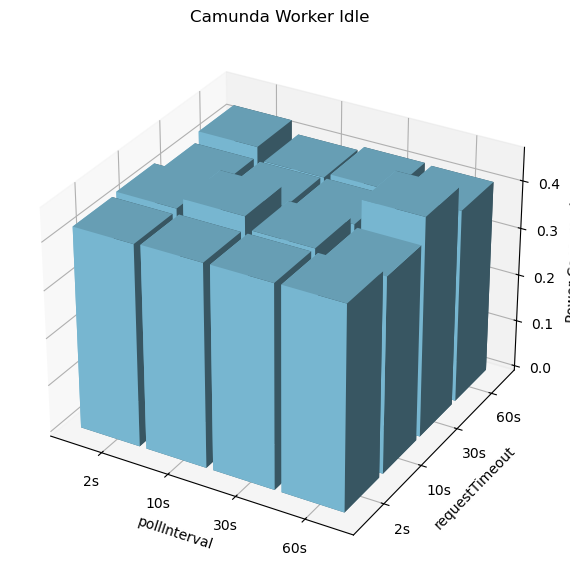

In [121]:
# Data for the 3D bar chart
x_data = ["2s","10s", "30s","60s"]
y_data = ["2s", "10s", "30s", "60s"]
z_data = power_values

# Convert data to numpy arrays for plotting
x_pos = np.arange(len(x_data))
y_pos = np.arange(len(y_data))
x_pos, y_pos = np.meshgrid(x_pos, y_pos)
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
z_pos = np.zeros_like(x_pos)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Bar chart plotting
dx = dy = 0.9  # Width and depth of bars
dz = np.array(z_data).flatten()

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color='skyblue')

# Setting labels for axes
ax.set_xticks(np.arange(len(x_data)) + 0.5)
ax.set_xticklabels(x_data)
ax.set_yticks(np.arange(len(y_data)) + 0.5)
ax.set_yticklabels(y_data)
ax.set_xlabel('pollInterval')
ax.set_ylabel('requestTimeout')
ax.set_zlabel('Power Consumption')

plt.title('Camunda Worker Idle')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


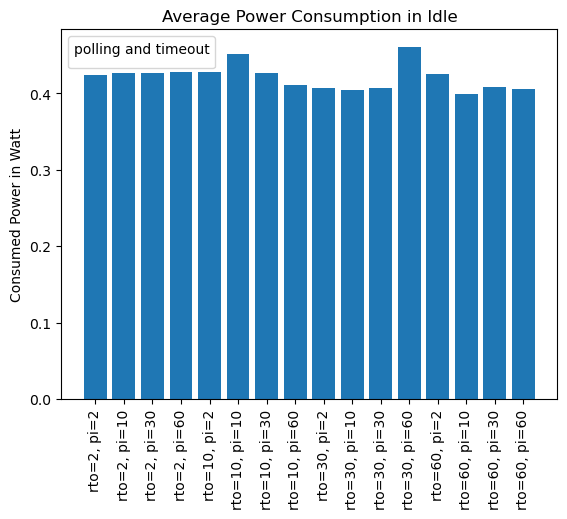

In [128]:
fig, ax = plt.subplots()

ax.bar(total_sums.columns, total_sums.loc['Power per Min',:])

ax.set_ylabel('Consumed Power in Watt')
ax.set_title('Average Power Consumption in Idle')
ax.legend(title='polling and timeout')
plt.xticks(rotation='vertical')

plt.show()